## Day 12

https://adventofcode.com/2022/day/12

In [255]:
import numpy as np

values = "SabcdefghijklmnopqrstuvwxyzE"

def parse12(filename):
    with open(filename) as f:
        return np.array( [ [values.index(c) for c in l.strip()] for l in f.readlines() ] )

### Part 1

In [284]:
def adjac(p,grid):
    xp,yp = p
    adj = []
    for dx,dy in [(-1,0),(0,1),(1,0),(0,-1)]:
        xn,yn = xp+dx,yp+dy
        if xn>=0 and xn<len(grid[0]) and yn>=0 and yn<len(grid):
            if grid[yn][xn]-grid[yp][xp]<=1:
                adj.append((xn,yn))
    return adj

def findStart(grid,S=0):
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r,c]==S:
                return (c,r)

def pathFinder(grid,S=(0,0),E=27):
    visited = []
    paths = [[S]]
    while len(paths):
        path = paths.pop(0)
        for a in adjac(path[-1],grid):
            if a not in path and a not in visited:
                newpath = list(path)
                newpath.append(a)
                xa,ya=a
                if grid[ya][xa]==E:
                    return newpath
                else:
                    paths.append(newpath)
                    visited.append(a)
    return []
                    
def part1(grid):
    S = findStart(grid,0)
    path = pathFinder(grid,S=S,E=27)
    return len(path)-1,path

In [285]:
grid0 = parse12("examples/example12.txt")
sol1_0,path1_0 = part1(grid0)
print("Test 1:",sol1_0)

Test 1: 31


In [369]:
grid = parse12("AOC2022inputs/input12.txt")
sol1,path1 = part1(grid)
print("Part 1:",sol1)

Part 1: 534


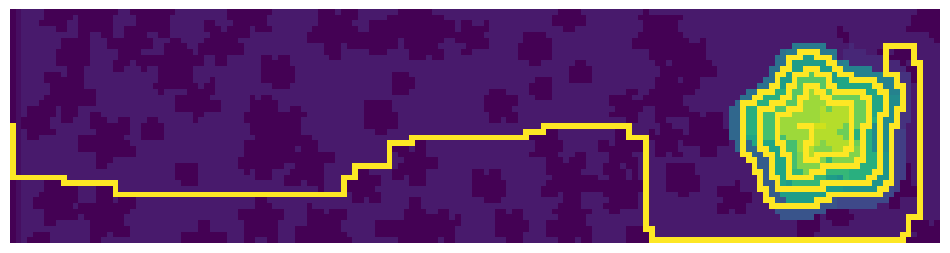

In [379]:
import matplotlib.pyplot as plt

gridpath = np.copy(grid)
for x,y in path1:
    gridpath[y][x] = 28

plt.figure(figsize=(12,4))
plt.imshow(gridpath)
_ = plt.axis('off')

### Part 2

There are maby starting points!

In [288]:
def findLower(grid,a=1):
    lower = []
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r,c]==a:
                lower.append((c,r))
    return lower

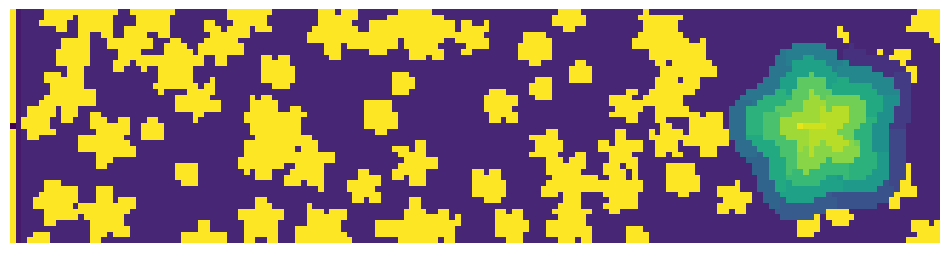

In [289]:
starts = findLower(grid,a=1)

gridstarts = np.copy(grid)
for x,y in starts:
    gridstarts[y][x] = 28

plt.figure(figsize=(12,4))
plt.imshow(gridstarts)
_ = plt.axis('off')

**Some starting point won't lead to a valid path**, since no neighbours have an altitude 1 unit larger. For instance, that's the upper right corner region (see below):


In [380]:
grid[:10,155:]

array([[3, 3, 3, 3, 1, 1, 1, 1],
       [3, 3, 3, 1, 1, 1, 1, 1],
       [3, 3, 3, 1, 1, 1, 1, 1],
       [3, 3, 1, 1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3, 3, 1, 1],
       [3, 3, 3, 3, 3, 3, 3, 1],
       [3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 3, 3, 3, 3, 3],
       [1, 1, 1, 3, 3, 3, 3, 3],
       [4, 1, 3, 3, 3, 3, 3, 3]])

**Computing the path for all _a_ starting point is not needed**, since many of these paths will share a common part from some position on. To speedup the search I can cache the already-explored paths, and re-use them if a given position is reached from different starting point:

In [381]:
def pathFinder2(grid,S=(0,0),E=27,exploredPaths={}):
    visited = []
    paths = [[S]]
    while len(paths):
        path = paths.pop(0)
        for a in adjac(path[-1],grid):
            if a not in path and a not in visited:
                newpath = list(path)
                if a in exploredPaths.keys():
                    pathtail = exploredPaths[a]
                    for i in range(len(newpath)-1):
                        exploredPaths[newpath[i]] = newpath[i+1:]+pathtail
                    return newpath+[a]+pathtail # don't forget to include a!
                newpath.append(a)
                xa,ya=a
                if grid[ya][xa]==E:
                    for i in range(len(newpath)-1):
                        exploredPaths[newpath[i]] = newpath[i+1:]
                    return newpath
                else:
                    paths.append(newpath)
                    visited.append(a)
    return []

In [382]:
def part2(grid):
    exploredPaths = {}
    starts = findLower(grid)
    print("{} starting points...".format(len(starts)))
    paths = []
    i = 0
    for S in starts:
        i+=1
        if i%100==0: print(i,end=" ")
        newpath = pathFinder2(grid,S=S,E=27,exploredPaths=exploredPaths)
        if len(newpath):
            paths.append((len(newpath)-1,newpath))
    return paths

In [383]:
paths = part2(grid)
print("\nPart 2:",sorted(paths)[0][0])

2064 starting points...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
Part 2: 525


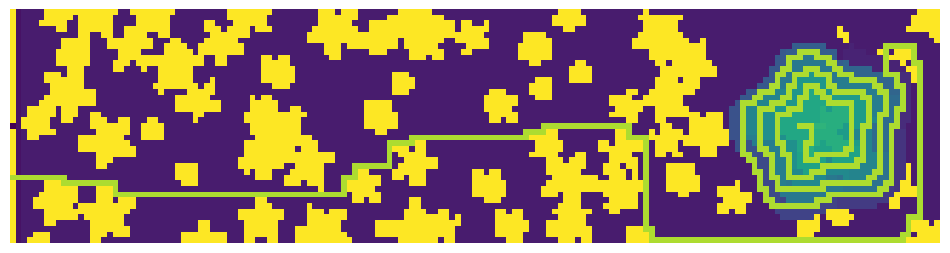

In [391]:
grid_2 = np.copy(grid)
for x,y in starts:
    grid_2[y][x] = 40
for x,y in sorted(paths)[0][1]:
    grid_2[y][x] = 35

plt.figure(figsize=(12,4))
plt.imshow(grid_2)
_ = plt.axis('off')